# **Análisis Exploratorio de Datos (EDA)**

Este notebook tiene como objetivo realizar un **Análisis Exploratorio de Datos (EDA)** sobre el conjunto de datos relacionado con el **Trastorno del Espectro Autista (TEA)** en niños.

A través de este análisis se busca:
- Comprender la estructura del dataset.
- Detectar posibles errores, valores nulos o inconsistencias.
- Obtener una visión preliminar de la distribución de variables.
- Identificar patrones relevantes antes de aplicar modelos predictivos.

Este paso es fundamental para garantizar la calidad del conjunto de datos que será utilizado en la etapa de modelado.


---



### Documentación Relacionada: [📄 Ver Descripción del Dataset Original (PDF)](https://github.com/AnaRamosCDIA/AA_PARCIAL_PREDICCION_TEA/blob/master/reports/Descripcion_Dataset_Original.pdf)

---


## Carga del Dataset

El dataset original se encuentra en formato `.arff`. Para poder analizarlo con pandas, utilizamos la función `loadarff` de la librería `scipy.io`.

A continuación, se importa el archivo y se convierte en un DataFrame de pandas, realizando una decodificación de las variables tipo `bytes` para facilitar su manipulación.


In [4]:
# Importar librerías necesarias
import pandas as pd
from scipy.io import arff

# Cargar el archivo .arff
data, meta = arff.loadarff("../data/raw/Autism-Child-Data.arff")

# Convertir a DataFrame de pandas
df = pd.DataFrame(data)

# Decodificar variables tipo 'bytes' a string (utf-8)
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.decode('utf-8')

# Mostrar las primeras filas del dataset
df.head()


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,0,1,1,0,1,0,0,...,m,Others,no,no,Jordan,no,5.0,4-11 years,Parent,NO
1,1,1,0,0,1,1,0,1,0,0,...,m,Middle Eastern,no,no,Jordan,no,5.0,4-11 years,Parent,NO
2,1,1,0,0,0,1,1,1,0,0,...,m,?,no,no,Jordan,yes,5.0,4-11 years,?,NO
3,0,1,0,0,1,1,0,0,0,1,...,f,?,yes,no,Jordan,no,4.0,4-11 years,?,NO
4,1,1,1,1,1,1,1,1,1,1,...,m,Others,yes,no,United States,no,10.0,4-11 years,Parent,YES


## Estructura Inicial del Dataset


In [6]:
# Verificar dimensión de la estructura del dataset
print(" Número de filas y columnas:", df.shape)

# Mostrar nombres de columnas
print("Nombres de columnas:")
print(df.columns)

 Número de filas y columnas: (292, 21)
Nombres de columnas:
Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')


## Renombramiento de Variables a Español

Con el fin de mejorar la legibilidad y facilitar la interpretación del análisis, se renombraron las variables del dataset a su equivalente en español. Esta decisión responde a:

- La coherencia con el idioma utilizado a lo largo del informe.
- La intención de hacer más accesible el contenido a docentes, revisores y otros lectores no especializados en terminología técnica en inglés.
- La claridad semántica que aporta identificar de forma explícita lo que representa cada variable.

Se respetó la estructura original del dataset y se mantuvieron las etiquetas técnicas entre paréntesis para conservar la trazabilidad con la fuente de datos.


In [8]:
# Renombrar las columnas A_Score a una referencia y columnas en inglés a español
df.rename(columns={
    'age': 'Edad',
    'gender': 'Género',
    'ethnicity': 'Etnia',
    'jundice': 'Ictericia_Neonatal',
    'austim': 'Antecedente_Familiar_TEA',
    'contry_of_res': 'País_de_Residencia',
    'used_app_before': 'Uso_App_Anterior',
    'relation': 'Relación_con_el_Niño',
    'result': 'Resultado_Diagnóstico',
    'age_desc': 'Grupo_Edad',
    'Class/ASD': 'Clase_TEA'
}, inplace=True)

# Verificar cambios
print("Columnas renombradas:")
print(df.columns.tolist())


Columnas renombradas:
['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'Edad', 'Género', 'Etnia', 'Ictericia_Neonatal', 'Antecedente_Familiar_TEA', 'País_de_Residencia', 'Uso_App_Anterior', 'Resultado_Diagnóstico', 'Grupo_Edad', 'Relación_con_el_Niño', 'Clase_TEA']


### Exploración de Datos y Estadísticas Básicas

In [10]:
# Mostrar tipos de datos de cada columna
print("\n Tipos de datos por columna:")
print(df.info())

# Mostrar valores únicos por columna
print("\n Valores únicos por columna:")
for col in df.columns:
    valores_unicos = df[col].unique()
    print(f"Columna '{col}': {valores_unicos}")

# Generar estadísticas descriptivas para las columnas numéricas y categóricas
print("\nEstadísticas descriptivas para columnas numéricas:")
print(df.describe())

print("\nEstadísticas descriptivas para columnas categóricas:")
print(df.describe(include='object'))

# Identificar columnas con valores nulos
conteo_nulos = df.isnull().sum()
columnas_con_nulos = conteo_nulos[conteo_nulos > 0]

# Mostrar solo columnas que tienen valores nulos
print("\n Columnas con valores nulos:")
print(columnas_con_nulos)



 Tipos de datos por columna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   A1_Score                  292 non-null    object 
 1   A2_Score                  292 non-null    object 
 2   A3_Score                  292 non-null    object 
 3   A4_Score                  292 non-null    object 
 4   A5_Score                  292 non-null    object 
 5   A6_Score                  292 non-null    object 
 6   A7_Score                  292 non-null    object 
 7   A8_Score                  292 non-null    object 
 8   A9_Score                  292 non-null    object 
 9   A10_Score                 292 non-null    object 
 10  Edad                      288 non-null    float64
 11  Género                    292 non-null    object 
 12  Etnia                     292 non-null    object 
 13  Ictericia_Neonatal        292 non-n

### Exploración de los Valores Únicos y su frecuencia por Columna para:
- Verificar la consistencia de categorías.
- Detectar posibles errores de codificación.
- Evaluar qué columnas pueden resultar irrelevantes o ruidosas para el análisis.
Esto permite tomar decisiones informadas antes de aplicar conversiones de tipo o eliminar variables.


In [12]:
# Mostrar valores únicos y su frecuencia por variable (sin tipos de datos)
for col in df.columns:
    print(f"\n✅ Columna: '{col}'")
    print(df[col].value_counts(dropna=False))



✅ Columna: 'A1_Score'
A1_Score
1    185
0    107
Name: count, dtype: int64

✅ Columna: 'A2_Score'
A2_Score
1    156
0    136
Name: count, dtype: int64

✅ Columna: 'A3_Score'
A3_Score
1    217
0     75
Name: count, dtype: int64

✅ Columna: 'A4_Score'
A4_Score
1    161
0    131
Name: count, dtype: int64

✅ Columna: 'A5_Score'
A5_Score
1    217
0     75
Name: count, dtype: int64

✅ Columna: 'A6_Score'
A6_Score
1    208
0     84
Name: count, dtype: int64

✅ Columna: 'A7_Score'
A7_Score
1    177
0    115
Name: count, dtype: int64

✅ Columna: 'A8_Score'
A8_Score
0    147
1    145
Name: count, dtype: int64

✅ Columna: 'A9_Score'
A9_Score
0    148
1    144
Name: count, dtype: int64

✅ Columna: 'A10_Score'
A10_Score
1    212
0     80
Name: count, dtype: int64

✅ Columna: 'Edad'
Edad
4.0     92
5.0     45
6.0     39
7.0     27
11.0    26
8.0     21
9.0     20
10.0    18
NaN      4
Name: count, dtype: int64

✅ Columna: 'Género'
Género
m    208
f     84
Name: count, dtype: int64

✅ Columna: 'Etni

## Variables no relevantes eliminadas. Razones:
- Son redundantes con respecto a otras.
- No aportan información directa sobre el niño o su diagnóstico.
- Presentan alta cardinalidad sin justificación contextual.
- No suman valor o son irrelevantes para el modelo.

* `Resultado_Diagnóstico`: cálculo derivado de las preguntas A1–A10. Altamente correlacionada con la variable objetivo; introducirla genera fuga de información (*data leakage*).
* `Grupo_Edad`: Redundante con Edad. Todos los casos pertenecen a un único grupo (4-11 years).
* `Relación_con_el_Niño`: No describe al niño, sino al encuestado; alto sesgo social.
* `País_de_Residencia`: 	Alta cardinalidad, poca representación por país. Inaplicable al contexto local (TDF).
* `Uso_App_Anterior`: 	Refiere al adulto encuestado, no aporta valor predictivo directo.
* `Etnia`: Falta de representatividad local, alta proporción de datos faltantes, posible sesgo.

Etnia y pais de residencia, si bien podrían aportar en otros contextos, se eliminarán para reducir el ruido, evitar sesgos socioculturales y garantizar un modelo centrado en el niño evaluado, aplicable al entorno geográfico definido (Tierra del Fuego).

In [14]:
# Columnas a eliminar por falta de relevancia o riesgo de sesgo
columnas_a_eliminar = [
    'Resultado_Diagnóstico',
    'Grupo_Edad',
    'Relación_con_el_Niño',
    'País_de_Residencia',
    'Uso_App_Anterior',
    'Etnia'  # Se elimina por no ser representativa del contexto local
]

# Eliminar columnas
df.drop(columns=columnas_a_eliminar, inplace=True)

# Confirmar columnas restantes
print(" Columnas actuales del dataset:")
print(df.columns.tolist())


 Columnas actuales del dataset:
['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'Edad', 'Género', 'Ictericia_Neonatal', 'Antecedente_Familiar_TEA', 'Clase_TEA']


## Imputación de Valores Faltantes en `age` con la Mediana

La variable `age` presenta algunos valores faltantes (`NaN`). Como se trata de una variable numérica continua y relevante para el modelo, se decide imputar esos valores utilizando la **mediana** en lugar de la media.

Esto se debe a que:
- La mediana es menos sensible a valores extremos.
- Preserva mejor la tendencia central de la distribución en datasets asimétricos.

Este método permite conservar los registros incompletos sin introducir sesgos significativos.



In [16]:
# Calcular la mediana de 'Edad'
mediana_edad = df['Edad'].median()
print("Mediana de 'Edad':", mediana_edad)

# Reemplazar valores nulos con la mediana (forma segura)
df['Edad'] = df['Edad'].fillna(mediana_edad)

# Verificar que no queden valores nulos
print("Valores nulos en 'Edad' después de la imputación:", df['Edad'].isnull().sum())


Mediana de 'Edad': 6.0
Valores nulos en 'Edad' después de la imputación: 0


---

## Conversión de Tipos de Datos y Codificación de Variables Categóricas

Vistas las salidas de las variables categóricas:

* **Género**: `m` / `f`
* **Ictericia\_Neonatal**: `yes` / `no`
* **Antecedente\_Familiar\_TEA**: `yes` / `no`
* **Clase\_TEA**: `YES` / `NO`

Todas presentan solo dos categorías posibles (variables **binarias**).

En esta etapa se transforma el dataset para garantizar su compatibilidad con algoritmos de aprendizaje automático y evitar problemas en fases posteriores del análisis.

---

### Objetivos:

* Convertir variables categóricas binarias representadas como texto (`'yes'`, `'no'`, `'m'`, `'f'`, `'YES'`, `'NO'`) en valores numéricos.
* Asegurar que las variables del test de cribado (`A1_Score` a `A10_Score`) estén en formato entero (`int`).
* Convertir la variable **Edad** a entero, ya que representa años completos.
* Estandarizar todos los formatos para evitar errores de tipo.

---

### Codificaciones aplicadas:

* `Género`: `'m'` → `0`, `'f'` → `1`
* `Ictericia_Neonatal` y `Antecedente_Familiar_TEA`: `'no'` → `0`, `'yes'` → `1`
* `Clase_TEA` (variable objetivo): `'NO'` → `0`, `'YES'` → `1`
* `Edad`: de `float` (posterior a imputación) a `int`

---

**Este paso deja el dataset completamente numérico, listo para análisis exploratorio visual, modelado y entrenamiento de algoritmos de predicción.**


In [18]:
# Convertir columnas del test de cribado a tipo entero
columnas_test = [
    'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score'
]
df[columnas_test] = df[columnas_test].astype(int)

# Convertir 'Edad' a entero
df['Edad'] = df['Edad'].astype(int)

# Mapear valores categóricos binarios a enteros
mapeo_binario = {'no': 0, 'yes': 1}
df['Ictericia_Neonatal'] = df['Ictericia_Neonatal'].map(mapeo_binario)
df['Antecedente_Familiar_TEA'] = df['Antecedente_Familiar_TEA'].map(mapeo_binario)

# Mapear género: m → 0, f → 1
df['Género'] = df['Género'].map({'m': 0, 'f': 1})

# Mapear clase objetivo: NO → 0, YES → 1
df['Clase_TEA'] = df['Clase_TEA'].map({'NO': 0, 'YES': 1})

# Verificar cambios
print(df.dtypes)
print("\nValores únicos por columna (tras la conversión):")
for col in df.columns:
    print(f"{col}: {df[col].unique()}")


A1_Score                    int32
A2_Score                    int32
A3_Score                    int32
A4_Score                    int32
A5_Score                    int32
A6_Score                    int32
A7_Score                    int32
A8_Score                    int32
A9_Score                    int32
A10_Score                   int32
Edad                        int32
Género                      int64
Ictericia_Neonatal          int64
Antecedente_Familiar_TEA    int64
Clase_TEA                   int64
dtype: object

Valores únicos por columna (tras la conversión):
A1_Score: [1 0]
A2_Score: [1 0]
A3_Score: [0 1]
A4_Score: [0 1]
A5_Score: [1 0]
A6_Score: [1 0]
A7_Score: [0 1]
A8_Score: [1 0]
A9_Score: [0 1]
A10_Score: [0 1]
Edad: [ 6  5  4 11 10  8  7  9]
Género: [0 1]
Ictericia_Neonatal: [0 1]
Antecedente_Familiar_TEA: [0 1]
Clase_TEA: [0 1]


In [19]:
# Verificar dimensión de la estructura del dataset
print(" Número de filas y columnas:", df.shape)

 Número de filas y columnas: (292, 15)


# Hasta aquí ya se realizaron los siguientes pasos

1.   Cargado y decodificado
2.   Columnas renombradas a español
3.   Columnas irrelevantes eliminadas
4.   Valores faltantes imputados (Edad con la mediana)
5.   Datos convertidos a tipo numérico (incluyendo binarización y casting a int)

---

**Todo lo cual se encuentra documentado detalladamente en el siguiente archivo:**
### Documentación Relacionada: [📄Descripción del Dataset Procesado (PDF)](https://github.com/AnaRamosCDIA/AA_PARCIAL_PREDICCION_TEA/blob/master/reports/Descripcion_Dataset_Procesado.pdf)

---


# Análisis Exploratorio Visual

En esta sección se realizarán visualizaciones con el objetivo de detectar patrones, distribuciones y posibles relaciones entre variables.

El análisis gráfico permite complementar la exploración numérica anterior y es útil para obtener intuiciones que luego guiarán el modelado predictivo.

## Análisis Univariado:
Análisis de variables individuales:
- Distribución de la variable objetivo (`Clase_TEA`)
- Análisis de edad, género, y otras variables relevantes.

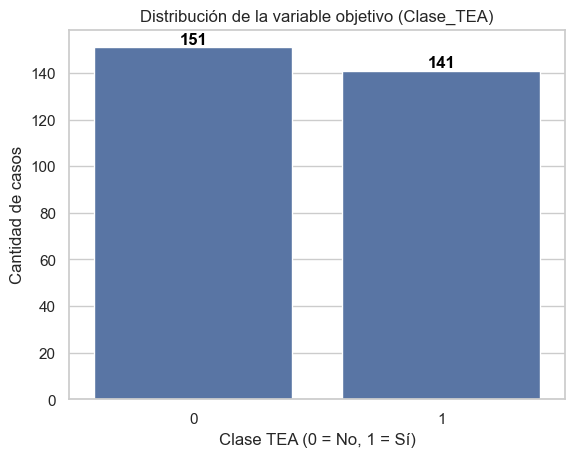

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo
sns.set(style="whitegrid")

# Crear el gráfico
ax = sns.countplot(x='Clase_TEA', data=df)

# Agregar etiquetas sobre las barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Personalizar el gráfico
plt.title("Distribución de la variable objetivo (Clase_TEA)")
plt.xlabel("Clase TEA (0 = No, 1 = Sí)")
plt.ylabel("Cantidad de casos")
plt.show()

**1. Distribución de la variable objetivo Clase_TEA:** El dataset presenta una distribución bastante balanceada entre las clases:

Clase 0 (NO TEA): alrededor de 151 casos

Clase 1 (SÍ TEA): alrededor de 141 casos

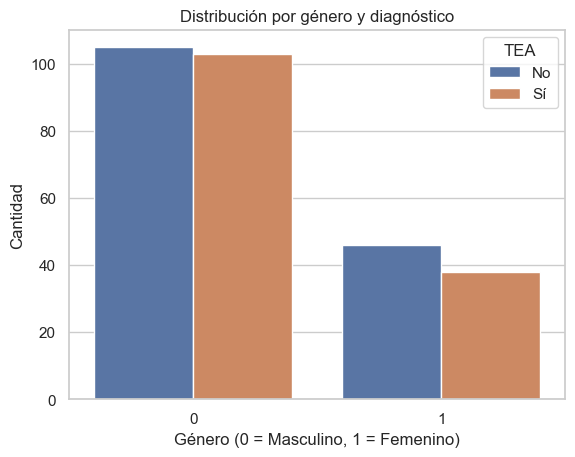

In [25]:
sns.countplot(x='Género', hue='Clase_TEA', data=df)
plt.title("Distribución por género y diagnóstico")
plt.xlabel("Género (0 = Masculino, 1 = Femenino)")
plt.ylabel("Cantidad")
plt.legend(title="TEA", labels=["No", "Sí"])
plt.show()

**2. Distribución por género y diagnóstico**

-La mayoría de los niños encuestados son de género masculino (Género = 0).
-Se observa que el diagnóstico positivo de TEA también es más frecuente en varones. Esto es consistente con la literatura clínica, donde se reporta que los varones tienen mayor prevalencia de diagnóstico de TEA que las mujeres. Puede ser una variable importante en el modelo.

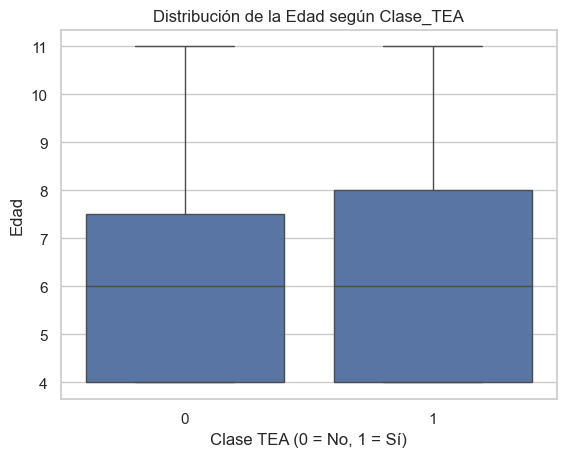

In [27]:
sns.boxplot(x='Clase_TEA', y='Edad', data=df)
plt.title("Distribución de la Edad según Clase_TEA")
plt.xlabel("Clase TEA (0 = No, 1 = Sí)")
plt.ylabel("Edad")
plt.show()

**3. Distribución de la Edad según Clase_TEA**

- Ambas clases (0 y 1) presentan edades distribuidas principalmente entre los 4 y 11 años.
- La mediana de edad es similar para ambas clases (~6 años).
- No se observan diferencias marcadas en la distribución de la edad entre niños con y sin TEA.
Esto sugiere que la variable Edad no tiene una influencia directa fuerte en el diagnóstico según este conjunto de datos, aunque puede seguir aportando información al modelo.

## Visualización de Respuestas del Cuestionario AQ-10-Child

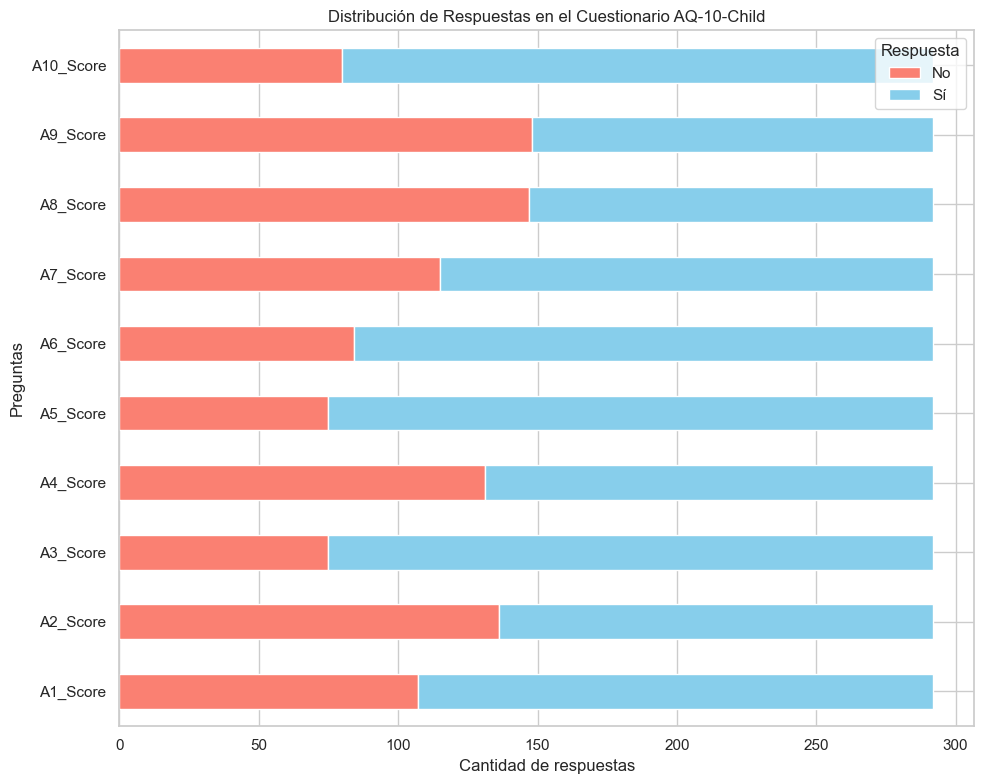

In [30]:
import matplotlib.pyplot as plt

# Seleccionar automáticamente las columnas A1 a A10 por nombre
preguntas = [col for col in df.columns if col.startswith('A') and col.endswith('_Score')]

# Contar respuestas 'No' (0) y 'Sí' (1) por cada pregunta
respuestas = df[preguntas].apply(lambda col: col.value_counts().reindex([0,1], fill_value=0)).T
respuestas.columns = ['No', 'Sí']

# Visualización
respuestas.plot(kind='barh', stacked=True, figsize=(10, 8), color=['salmon', 'skyblue'])
plt.title("Distribución de Respuestas en el Cuestionario AQ-10-Child")
plt.xlabel("Cantidad de respuestas")
plt.ylabel("Preguntas")
plt.legend(title="Respuesta")
plt.tight_layout()
plt.show()


## Análisis de correlación:
Este análisis visual complementa la exploración anterior y permite identificar posibles relaciones entre variables que podrían ser útiles al momento de entrenar modelos predictivos.  
En la siguiente etapa se seleccionarán variables, se prepararán los datos y se entrenarán distintos algoritmos supervisados.

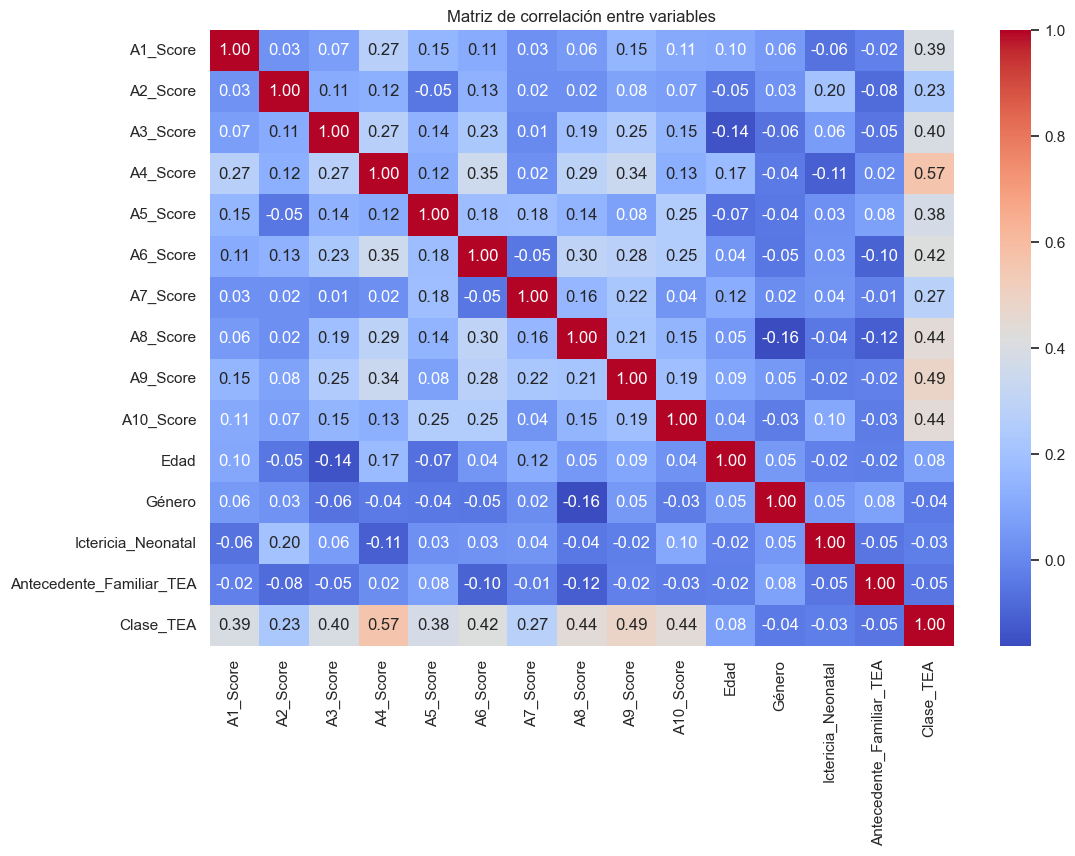


Correlación con la variable objetivo (Clase_TEA):
Clase_TEA                   1.000000
A4_Score                    0.568502
A9_Score                    0.486163
A10_Score                   0.439942
A8_Score                    0.438389
A6_Score                    0.417271
A3_Score                    0.395545
A1_Score                    0.393534
A5_Score                    0.379859
A7_Score                    0.273949
A2_Score                    0.229045
Edad                        0.075230
Ictericia_Neonatal         -0.025049
Género                     -0.038782
Antecedente_Familiar_TEA   -0.048800
Name: Clase_TEA, dtype: float64


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar la matriz de correlación utilizando un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación entre variables")
plt.show()

# Mostrar la correlación de cada variable con la variable objetivo
correlation_matrix = df.corr()  # Asegurar que la matriz de correlación está definida
print("\nCorrelación con la variable objetivo (Clase_TEA):")
print(correlation_matrix['Clase_TEA'].sort_values(ascending=False))

Correlaciones en función de las descripciones de cada **A*_Score**  

| **A*_Score**                                | **Descripción**                                                               | **Correlación con Clase_TEA** |
|---------------------------------------------|----------------------------------------------------------------------------|--------------------------|
| A1_Score                                   | Él / Ella a menudo se da cuenta de la presencia de pequeños sonidos cuando otros no lo hacen. | **0.393** |
| A2_Score                                   | Él / Ella por lo general se concentra más en toda la imagen, en lugar de los pequeños detalles. | **0.229** |
| A3_Score                                   | En un grupo social, él / ella puede fácilmente hacer un seguimiento de las conversaciones de personas diferentes. | **0.395** |
| A4_Score                                   | A él / ella le resulta fácil ir y venir entre distintas actividades. | **0.568** |
| A5_Score                                   | Él / Ella no sabe cómo mantener una conversación con su / sus compañeros. | **0.379** |
| A6_Score                                   | Él / Ella es bueno (a) en conversaciones sociales. | **0.417** |
| A7_Score                                   | Cuando a él / ella se le lee un cuento, le resulta difícil trabajar las intenciones, sentimientos o características. | **0.273** |
| A8_Score                                   | Cuando él / ella fue preescolar, utilizó el juego para disfrutar e involucrarse con otros niños. | **0.438** |
| A9_Score                                   | A él / ella le resulta fácil interpretar lo que alguien está pensando o sintiendo con sólo mirar su cara. | **0.486** |
| A10_Score                                  | A él / ella le resulta difícil hacer nuevos amigos. | **0.439** |


## Interpretación: Matriz de Correlación

Este gráfico permite identificar qué variables tienen mayor relación lineal (positiva o negativa) con la variable objetivo `Clase_TEA`, así como detectar **multicolinealidad** entre predictores.

---

###  Variables con mayor correlación con `Clase_TEA`:

| **A*_Score**                                | **Descripción**                                                               | **Correlación** |
|---------------------------------------------|----------------------------------------------------------------------------|--------------|
| A4_Score                                   | A él / ella le resulta fácil ir y venir entre distintas actividades. | **0.57** |
| A9_Score                                   | A él / ella le resulta fácil interpretar lo que alguien está pensando o sintiendo con sólo mirar su cara. | **0.49** |
| A10_Score                                  | A él / ella le resulta difícil hacer nuevos amigos. | **0.44** |
| A8_Score                                   | Cuando él / ella fue preescolar, utilizó el juego para disfrutar e involucrarse con otros niños. | **0.44** |
| A6_Score                                   | Él / Ella es bueno(a) en conversaciones sociales. | **0.42** |
| A5_Score                                   | Él / Ella no sabe cómo mantener una conversación con su / sus compañeros. | **0.42** |
| A3_Score                                   | En un grupo social, él / ella puede fácilmente hacer un seguimiento de las conversaciones de personas diferentes. | **0.40** |
| A1_Score                                   | Él / Ella a menudo se da cuenta de la presencia de pequeños sonidos cuando otros no lo hacen. | **0.39** |

Estas variables del cuestionario AQ-10 muestran una **correlación moderada a fuerte** con la clase TEA. Son buenos candidatos a incluir en el modelo predictivo.

---

### Variables con baja o nula correlación:

| **Variable**                  | **Descripción**                                        | **Correlación** |
|--------------------------------|------------------------------------------------------|--------------|
| Edad                           | Edad de la persona evaluada.                         | **0.08**   |
| Género                         | Sexo biológico registrado (masculino / femenino).   | **-0.03**  |
| Ictericia_Neonatal             | Historial de ictericia en el período neonatal.      | **-0.05**  |
| Antecedente Familiar TEA       | Presencia de diagnóstico TEA en familiares directos. | **-0.04**  |


➡️ Estas variables **no presentan correlación lineal significativa**, aunque podrían tener valor predictivo en modelos no lineales (como Random Forest).

---

###  Multicolinealidad entre preguntas del cuestionario

Se observan **correlaciones altas entre variables del AQ-10**, por ejemplo:

| **Relación entre A*_Score**          | **Correlación** |
|--------------------------------------|---------------|
| A3_Score (En un grupo social, él / ella puede fácilmente hacer un seguimiento de las conversaciones de personas diferentes) con A1_Score (Él / Ella a menudo se da cuenta de la presencia de pequeños sonidos cuando otros no lo hacen) | **0.71** |
| A10_Score (A él / ella le resulta difícil hacer nuevos amigos) con A9_Score (A él / ella le resulta fácil interpretar lo que alguien está pensando o sintiendo con sólo mirar su cara) | **0.55** |


Esto sugiere que algunas preguntas están fuertemente relacionadas entre sí y podrían estar captando dimensiones similares del comportamiento.

➡️ En modelos como regresión logística, esto podría generar colinealidad, pero en árboles o ensambles no suele ser un problema.

---


# Conclusiones del EDA
- Se identificaron y corrigieron errores de codificación y nombres.
- Se imputaron los valores nulos en Edad.
- Se eliminaron variables irrelevantes o sesgadas.
- Se estandarizaron tipos y se codificaron todas las variables.
- El dataset quedó listo para la etapa de modelado supervisado.

El análisis exploratorio ha permitido conocer en profundidad la estructura y contenido del dataset, así como la relación entre las variables predictoras y la variable objetivo Clase_TEA. Entre los principales hallazgos:

Las variables del cuestionario AQ-10 presentan una correlación significativa con la presencia de indicios de TEA, lo que valida su utilidad como predictores.

Las variables sociodemográficas muestran baja correlación lineal, pero podrían aportar valor en modelos más complejos o no lineales.

No se detectaron problemas graves de datos faltantes ni valores atípicos que comprometan el modelado.

Se han eliminado variables que inducían sesgo, eran redundantes o irrelevantes.

# Próximas Etapas
En otro notebook se avanzará con los siguientes pasos:

1.Selección y partición del dataset en conjuntos de entrenamiento y prueba.

2.Entrenamiento de modelos supervisados

3.Evaluación de desempeño y comparación de métricas.

4.Interpretabilidad y despliegue (si aplica).



In [35]:
# Guardar dataset procesado en formato CSV
df.to_csv("../data/processed/Dataset_Procesado_TEA_INFANCIA.csv", index=False)

print("✅ Dataset procesado guardado exitosamente en 'data/processed/Dataset_Procesado_TEA_INFANCIA.csv'")


✅ Dataset procesado guardado exitosamente en 'data/processed/Dataset_Procesado_TEA_INFANCIA.csv'
